# 1. 라이브러리 및 데이터 불러오기

In [1]:
import pandas as pd

In [2]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/insurance.csv'

In [3]:
data = pd.read_csv(file_url)
data

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [4]:
data.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [5]:
round(data.describe(),2)

,age,sex,bmi,children,smoker,charges
count,1338.00,1338.00,1338.00,1338.00,1338.0,1338.00
mean,39.21,0.51,30.66,1.09,0.2,13270.42
std,14.05,0.50,6.10,1.21,0.4,12110.01
min,18.00,0.00,15.96,0.00,0.0,1121.87
25%,27.00,0.00,26.30,0.00,0.0,4740.29
50%,39.00,1.00,30.40,1.00,0.0,9382.03
75%,51.00,1.00,34.69,2.00,0.0,16639.91
max,64.00,1.00,53.13,5.00,1.0,63770.43


# 2. 학습셋과 실험셋 나누기

In [6]:
x = data[['age', 'sex', 'bmi', 'children', 'smoker']]
y = data['charges']

In [8]:
x.head()

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0


In [9]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [14]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------------------------------ --------- 8.4/11.1 MB 52.1 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 26.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ----------------- ---------------------- 17.6/41.0 MB 92.0 MB/s eta 0:00:01
   -------------------- ------------------- 20.7/41.0 MB 52.3 MB/s eta 0:00:01
   ---------------------------------------  40.9/41.0 MB 70.2 MB/s eta 0:00:01
   ---------------------------------------- 41.0/41.0 MB 53.1 MB/s eta 0:00:00

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [s

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=100)


In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 5)
(268, 5)
(1070,)
(268,)


# 3. 모델링

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [18]:
model.fit(x_train, y_train)  # 80% data 입력해서 학습

LinearRegression()

# 4. 모델을 활용해 예측

In [19]:
pred = model.predict(x_test)  #pred에는 인공지능이 예측한 보험료를 가지고 있다.

# 5. 예측 모델 평가

In [20]:
comparision = pd.DataFrame({'actual': y_test, 'pred': pred})

In [21]:
comparision

,actual,pred
12,1826.84300,4765.249466
306,20177.67113,4957.730865
318,7421.19455,8298.988153
815,1877.92940,3078.811868
157,15518.18025,24165.956542
...,...,...
713,1984.45330,5776.764928
1282,14283.45940,23102.847340
531,14043.47670,14280.732585
537,8825.08600,10527.417291


In [22]:
import matplotlib.pylab as plt
import seaborn as sns

<Axes: xlabel='actual', ylabel='pred'>

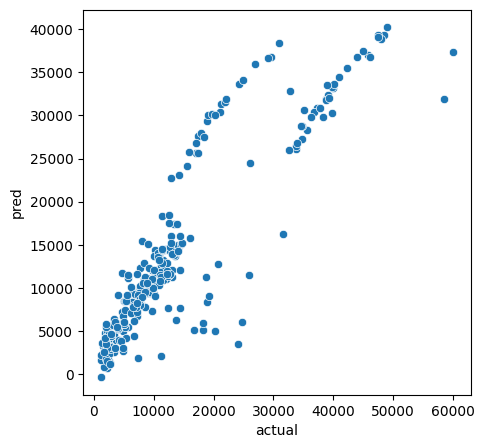

In [23]:
plt.figure(figsize=(5,5))
sns.scatterplot(x = 'actual', y = 'pred', data = comparision)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)   #mse

5684.927776334484

In [26]:
model.score(x_test, y_test)   #정확도

0.7938983522335603